In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Load the dataset    
file_path = '.../Indiana.xlsx'  # Update this with the actual file path
data = pd.read_excel(file_path)

#Use the correct column name 'price'
price_data = data['price']

# Calculate the ratios A_i = S_{i+1} / S_i
ratios = price_data[1:].values / price_data[:-1].values

#Define the upper and lower bounds
lower_bound = np.percentile(ratios, 5)  # lower 5th percentile
upper_bound = np.percentile(ratios, 95) # upper 95th percentile

#Identify jumps: If the ratio is outside the bounds, it's considered a jump
jumps = (ratios < lower_bound) | (ratios > upper_bound)

#Create a copy of the price data for adjusted version
adjusted_price_data = price_data.copy()

#Replace jumps with linear interpolation
for i in range(1, len(jumps) + 1):
    if jumps[i-1]:
        adjusted_price_data[i] = (price_data[i-1] + price_data[i+1]) / 2

#Create a DataFrame to show original and adjusted prices with jump flags
result_df = pd.DataFrame({
    'Original_Price': price_data,
    'Adjusted_Price': adjusted_price_data,
    'Is_Jump': np.insert(jumps, 0, False)
})

#Save the DataFrame to an Excel file
result_df.to_excel('.../jump/Indiana_adjusted.xlsx', index=False)
print(result_df.head())


   Original_Price  Adjusted_Price  Is_Jump
0           47.27           47.27    False
1           46.05           46.05    False
2           41.60           41.60    False
3           36.65           36.65    False
4           42.56           42.56    False


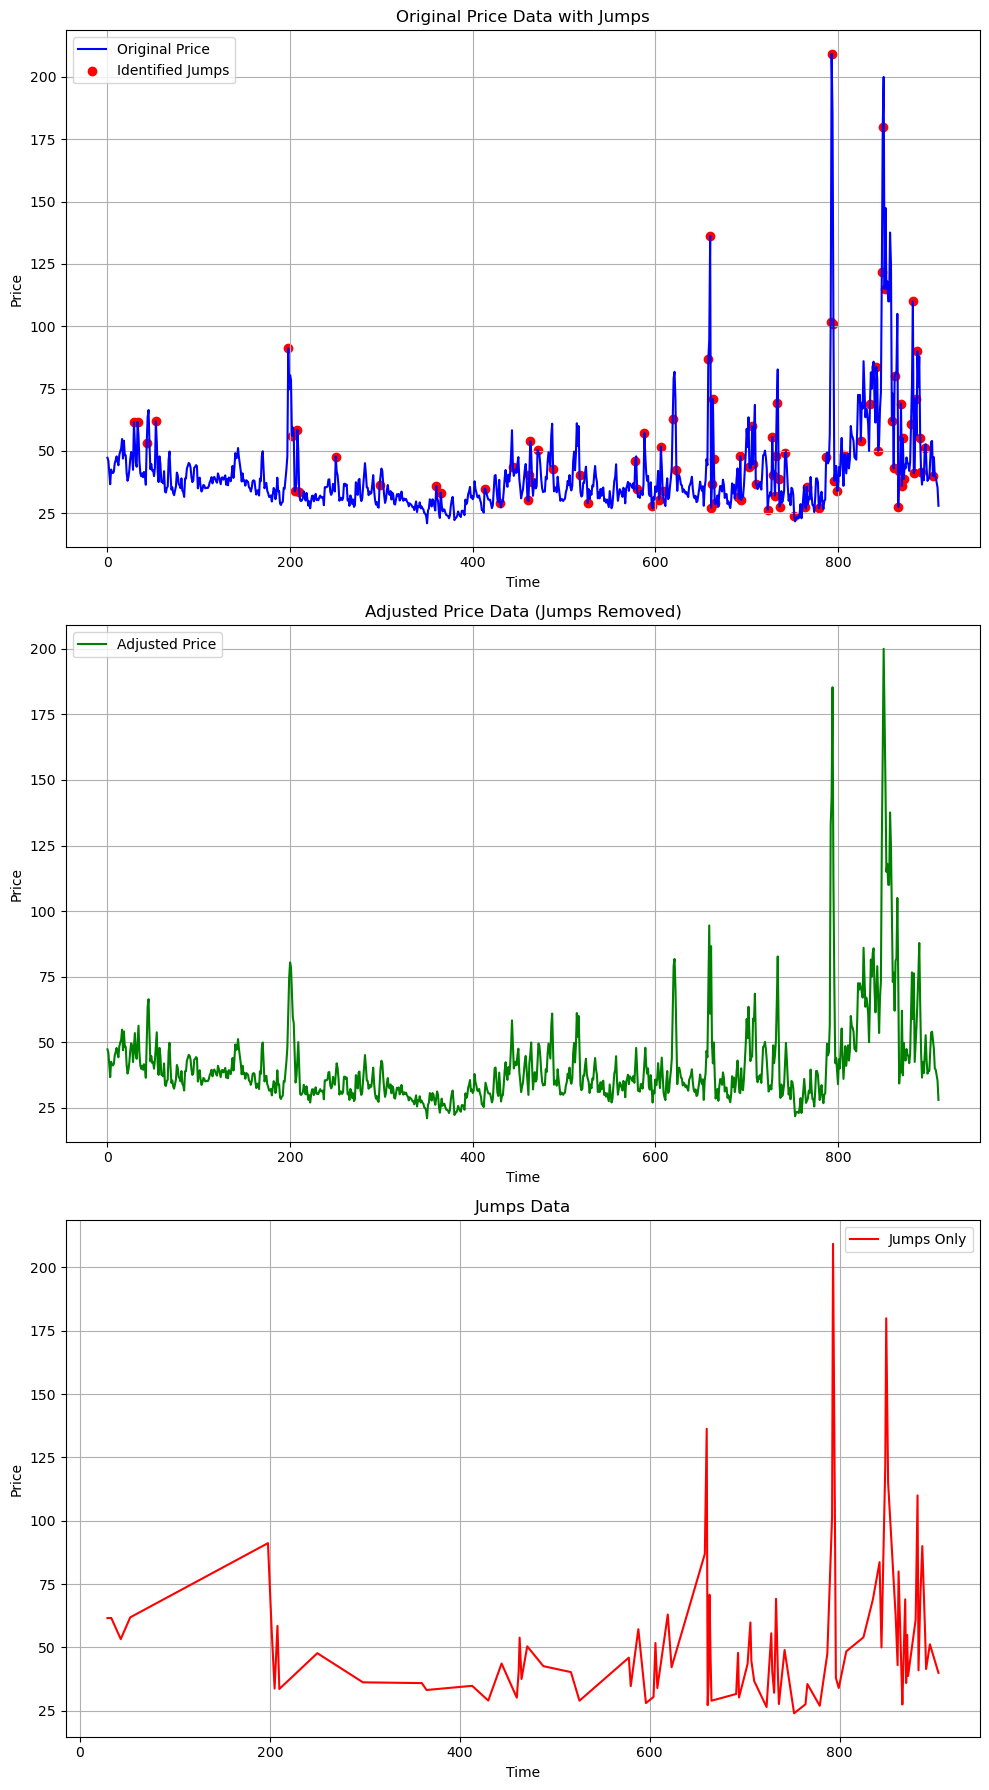

In [2]:

# Create a figure with 3 subplots (Original with Jumps, Adjusted without Jumps, and Jumps Only)
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Subplot 1: Original Price Data with Jumps Highlighted
axs[0].plot(price_data, label='Original Price', color='blue')
axs[0].scatter(price_data.index[1:][jumps], price_data[1:][jumps], color='red', label='Identified Jumps')
axs[0].set_title('Original Price Data with Jumps')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Price')
axs[0].legend()
axs[0].grid(True)

# Subplot 2: Adjusted Price Data without Jumps
axs[1].plot(adjusted_price_data, label='Adjusted Price', color='green')
axs[1].set_title('Adjusted Price Data (Jumps Removed)')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Price')
axs[1].legend()
axs[1].grid(True)

# Subplot 3: Jumps Only
jumps_only = price_data[1:][jumps]
axs[2].plot(jumps_only.index, jumps_only.values, label='Jumps Only', color='red')
axs[2].set_title('Jumps Data')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Price')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()
